# Exploratory Data Analysis with Pandas

In [80]:
import pandas as pd
import numpy as np

In [81]:
# import raw data as is? 
movies = pd.read_csv('data\movies_2.csv')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\olive\AppData\Local\Temp\ipykernel_25960\4280913013.py:2: SyntaxWarning: invalid escape sequence '\m'
  movies = pd.read_csv('data\movies_2.csv')


In [82]:
movies.head()

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,1,Look Who's Talking,PG-13,7500000.0,296000000.0,1989-10-12,Romance,93.0,5.9,73638.0,"After a single, career-minded woman is left on..."
1,2,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,99.0,7.4,91075.0,An old Jewish woman and her African-American c...
2,3,Turner & Hooch,PG,13000000.0,71079915.0,1989-07-28,Crime,100.0,7.2,91415.0,"Det. Scott Turner (Tom Hanks) is an uptight, b..."
3,4,Born on the Fourth of July,R,14000000.0,161001698.0,1989-12-20,War,145.0,7.2,91415.0,The biography of Ron Kovic. Paralyzed in the V...
4,5,Field of Dreams,PG,15000000.0,84431625.0,1989-04-21,Drama,107.0,7.5,101702.0,"An Iowa corn farmer, hearing voices, interpret..."


# Describe the raw data

In [83]:
movies.shape

(616, 11)

In [84]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       616 non-null    int64  
 1   Title         615 non-null    object 
 2   MPAA Rating   615 non-null    object 
 3   Budget        615 non-null    float64
 4   Gross         615 non-null    float64
 5   Release Date  615 non-null    object 
 6   Genre         615 non-null    object 
 7   Runtime       615 non-null    float64
 8   Rating        508 non-null    float64
 9   Rating Count  508 non-null    float64
 10  Summary       496 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 53.1+ KB


In [85]:
# dtype is a pandas series of data types
print(type(movies.dtypes))
movies.dtypes['MovieID']

<class 'pandas.core.series.Series'>


dtype('int64')

In [86]:
# NaN values
movies.isna().sum()

MovieID           0
Title             1
MPAA Rating       1
Budget            1
Gross             1
Release Date      1
Genre             1
Runtime           1
Rating          108
Rating Count    108
Summary         120
dtype: int64

## NaN values

In [87]:
movies[movies.Title.isna()]

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
615,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Duplicates

In [88]:
movies.duplicated().sum()

np.int64(0)

In [89]:
movies[movies['Rating'].isna()].head()

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
486,487,Fast & Furious 6,PG-13,160000000.0,7.886798e+08,2013-05-06,Action,130.0,NaN,NaN,NaN
489,490,Oz: The Great and Powerful,PG,200000000.0,4.918685e+08,2013-03-07,Drama,130.0,NaN,NaN,NaN
510,511,Maleficent,PG,180000000.0,7.585398e+08,2014-05-28,Fantasy,97.0,NaN,NaN,NaN
511,512,The Amazing Spider-Man 2,PG-13,200000000.0,7.057174e+08,2014-04-16,Action,142.0,NaN,NaN,NaN
512,513,Transformers: Age of Extinction,PG-13,210000000.0,1.091405e+09,2014-06-25,Action,165.0,NaN,NaN,NaN


# Make Data Frame easier to handle - standardize

## Reset Column Titles

In [90]:
# are there any spaces in the column titles?
cols = pd.Series(movies.columns)
mapper = {col:col.replace(' ','_').lower() for col in cols}

movies.rename(columns=mapper,inplace=True)

## Set index

In [91]:
movies.set_index(['movieid'], inplace=True)

## Get rid of irrelevant data

In [92]:
movies.drop(columns=['summary'], inplace=True)

# Data cleaning

## Handle NaN values

In [93]:
movies.dropna(subset=['title'], inplace=True)

In [94]:
movies.fillna({ 'rating': movies['rating'].median() }, inplace=True)

In [95]:
movies.fillna({ 'rating_count': movies['rating_count'].median() }, inplace=True)

## data type conversions

In [96]:
# convert Release Date to datetime
movies.release_date = pd.to_datetime(movies.release_date) #, format='%Y-%m-%d')
# set the datetime accuracy. pandas uses ns, but the accuracy should not be higher than given in the raw data.
movies.release_date = movies.release_date.values.astype('datetime64[D]') # NOTE in order to use astype, the values of the pandas series have to be accessed 
# movies.release_date = movies.release_date.dt.floor('D') # NOTE dt can be used in pandas DateTime series. the line is not needed to convert the data type

In [97]:
movies.gross = movies.gross.astype('int')
movies.budget = movies.budget.astype('int')

## standardize

In [98]:
# TODO For numerical values, make sure all values have a certain measurement unit.

In [99]:
# For strings, make sure all values are either in lower or upper case.
movies.title = movies.title.apply(lambda x: x.lower())
movies.genre = movies.genre.apply(lambda x: x.lower())
movies.mpaa_rating = movies.mpaa_rating.apply(lambda x: x.lower())

# Explore Data

In [100]:
movies.head()

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
1,look who's talking,pg-13,7500000,296000000,1989-10-12,romance,93.0,5.9,73638.0
2,driving miss daisy,pg,7500000,145793296,1989-12-13,comedy,99.0,7.4,91075.0
3,turner & hooch,pg,13000000,71079915,1989-07-28,crime,100.0,7.2,91415.0
4,born on the fourth of july,r,14000000,161001698,1989-12-20,war,145.0,7.2,91415.0
5,field of dreams,pg,15000000,84431625,1989-04-21,drama,107.0,7.5,101702.0


In [101]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   title         615 non-null    object       
 1   mpaa_rating   615 non-null    object       
 2   budget        615 non-null    int64        
 3   gross         615 non-null    int64        
 4   release_date  615 non-null    datetime64[s]
 5   genre         615 non-null    object       
 6   runtime       615 non-null    float64      
 7   rating        615 non-null    float64      
 8   rating_count  615 non-null    float64      
dtypes: datetime64[s](1), float64(3), int64(2), object(3)
memory usage: 48.0+ KB


In [102]:
# MPAA rating
movies.mpaa_rating.value_counts()

mpaa_rating
pg-13    285
pg       161
r        142
g         27
Name: count, dtype: int64

In [103]:
# genre
movies.genre.value_counts()

genre
action             110
comedy              99
animation           87
drama               66
thriller            41
science fiction     37
adventure           30
family              29
romance             28
fantasy             27
crime               17
horror              14
mystery             11
war                  9
western              6
history              4
Name: count, dtype: int64

In [104]:
# basic statistics
movies.describe()

,budget,gross,release_date,runtime,rating,rating_count
count,6.150000e+02,6.150000e+02,615,615.000000,615.000000,6.150000e+02
mean,9.491710e+07,4.453221e+08,2004-08-14 02:22:49,118.642276,6.914309,3.220443e+05
min,6.000000e+04,5.300000e+07,1989-04-21 00:00:00,79.000000,4.100000,1.491800e+04
25%,4.000000e+07,2.158939e+08,1996-11-19 00:00:00,102.000000,6.500000,1.503800e+05
50%,8.000000e+07,3.510404e+08,2004-07-23 00:00:00,117.000000,6.900000,2.403475e+05
75%,1.400000e+08,5.851766e+08,2012-06-13 12:00:00,132.000000,7.400000,3.814775e+05
max,4.000000e+08,2.796000e+09,2019-12-09 00:00:00,201.000000,9.000000,2.127228e+06
std,6.748114e+07,3.394075e+08,NaN,22.252376,0.807794,2.944014e+05


## Outliers

### Rating

<Axes: >

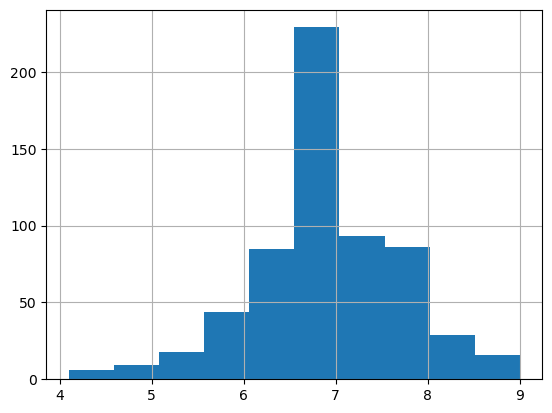

In [105]:
movies.rating.hist()

In [106]:
def outliers(series: pd.Series):
    '''
    Get indices of values outside of the inner quartile range.
    '''
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    threshold = 1.5*(q3-q1)
    return np.logical_not(series.between(q1-threshold,q3+threshold))

rating_outliers = movies[outliers(movies.rating)].sort_values(by='rating')
rating_outliers

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
427,the last airbender,pg,150000000,318502923,2010-06-30,adventure,103.0,4.1,139750.0
279,spy kids 3-d: game over,pg,38000000,197011982,2003-07-25,family,84.0,4.2,50809.0
414,2012,pg-13,200000000,769653595,2009-10-10,adventure,158.0,4.3,28949.0
439,alvin and the chipmunks: chipwrecked,g,75000000,342695435,2011-12-14,family,87.0,4.3,28949.0
228,nutty professor ii: the klumps,pg-13,84000000,123307945,2000-07-27,comedy,106.0,4.4,46222.0
403,alvin and the chipmunks: the squeakquel,pg,75000000,443140005,2009-12-21,family,88.0,4.5,40285.0
245,dr. dolittle 2,pg,70000000,176104344,2001-06-22,comedy,87.0,4.7,39656.0
381,marley and me,pg,60000000,247800000,2008-12-25,drama,115.0,4.7,252223.0
402,the twilight saga: new moon,pg-13,50000000,709827462,2009-03-15,romance,130.0,4.7,252223.0


## EDA Exercises


### 1
Show the movies with more than 7 in Rating & greater than 50 million Gross

In [107]:
movies[(movies.rating > 7.0) & (movies.gross > 50000000)].sort_values(['rating', 'gross'])

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
143,the birdcage,r,31000000,185260553,1996-03-08,comedy,117.0,7.1,74466.0
113,stargate,pg-13,55000000,196567262,1994-10-27,science fiction,121.0,7.1,167516.0
189,the prince of egypt,pg,70000000,218613188,1998-12-15,animation,99.0,7.1,110340.0
260,the ring,pg-13,48000000,249348933,2002-10-18,horror,115.0,7.1,303397.0
181,shakespeare in love,r,25000000,289317794,1998-12-11,history,122.0,7.1,203939.0
...,...,...,...,...,...,...,...,...,...
100,pulp fiction,r,8000000,213928762,1994-09-10,thriller,154.0,8.9,1690474.0
84,schindler's list,r,22000000,321365567,1993-11-29,history,195.0,8.9,1117322.0
99,jurassic park iii,pg-13,93000000,368800000,2001-07-16,thriller,92.0,8.9,1690474.0


### 2
Show the movies with more than 7 in Rating & greater than 50 million Gross & MPAA Rating as PG

In [108]:
movies[(movies.rating > 7.0) & (movies.gross > 50000000) & (movies.mpaa_rating == 'pg')].sort_values(['rating', 'gross'])

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
189,the prince of egypt,pg,70000000,218613188,1998-12-15,animation,99.0,7.1,110340.0
462,hotel transylvania,pg,85000000,358375603,2012-09-20,animation,91.0,7.1,208916.0
469,brave,pg,185000000,538983207,2012-06-21,animation,93.0,7.1,346490.0
3,turner & hooch,pg,13000000,71079915,1989-07-28,crime,100.0,7.2,91415.0
50,star trek vi: the undiscovered country,pg,27000000,96900000,1991-12-05,science fiction,113.0,7.2,66086.0
73,a league of their own,pg,40000000,107458785,1992-07-01,comedy,128.0,7.2,85932.0
426,megamind,pg,130000000,321887208,2010-10-28,animation,95.0,7.2,212563.0
485,the croods,pg,135000000,585178928,2013-03-20,animation,98.0,7.2,180043.0
452,kung fu panda 2,pg,150000000,665692281,2011-05-25,animation,91.0,7.2,234612.0


### 3 
Show the count of Animation movies with more than 7 in Rating (use the shape() method)

In [109]:
# REVIEW is it useful to build a dict from the categorical data? 
movies[(movies.genre=='animation') & (movies.rating>7.0)].shape

(39, 9)

### 4
Show the top 5 movies based on Budget

In [115]:
movies.sort_values('budget',ascending=False).iloc[:5,:]
# movies.sort_values('budget',ascending=False).iloc[:5,:] # TODO What happens here?

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
595,avengers: infinity war,pg-13,400000000,2048000000,2018-04-23,action,149.0,6.9,240347.5
455,pirates of the caribbean: on stranger tides,pg-13,380000000,1045713802,2011-05-14,action,136.0,6.6,455211.0
615,avengers: endgame,pg-13,356000000,2796000000,2019-04-22,action,181.0,6.9,240347.5
575,star wars: the last jedi,pg-13,317000000,1333000000,2019-12-09,science fiction,152.0,6.9,240347.5
376,pirates of the caribbean: at world's end,pg-13,300000000,961000000,2007-05-19,adventure,169.0,7.1,565402.0


### 5 

Show the top 5 Comedy movies by Rating

In [116]:
movies[movies.genre=='comedy'].sort_values('rating',ascending=False).iloc[:5]

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
112,forrest gump,pg-13,55000000,677945399,1994-07-06,comedy,142.0,8.8,1657851.0
186,the truman show,pg,60000000,264118201,1998-06-04,comedy,103.0,8.1,859224.0
81,groundhog day,pg,14600000,70906973,1993-02-11,comedy,101.0,8.0,549538.0
255,"monsters, inc.",g,115000000,562816256,2001-11-01,comedy,92.0,8.0,758349.0
317,the 40 year old virgin,r,26000000,109449237,2005-08-11,comedy,116.0,7.7,500448.0




Top 5 movie names by Rating

Top 3 high Gross Romance movies released after 1999 (typecast it to datetime)

How many of each Genre are present in the DataFrame? (use value_counts() method which applies to Series, not DataFrame)

Top 5 most expensive movies released after 1999 (measured by Budget)

Most & least frequent MPAA Rating in the dataset in terms of occurrences

Most & least expensive Genre (take an average of all Budget measures grouped by Genre - use the groupBy() method)

Which Genre is most favoured?
